**Created by Sanskar Hasija**

**[PLAYGROUND S-3,E-5] 📊EDA + MODELLING📈**

**24 January 2023**


# <center> [Playground S-3,E-5] 📊EDA + Modelling📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.3 Continuos and Categorical Data Distribution](#4.2)
    - [4.4 Feature Distribution of Continous Features](#4.3)
    - [4.5 Feature Distribution of Categorical Features](#4.4)
    - [4.6 Target Distribution ](#4.5)
- [5. Data Cleaning and Processing ](#5)   
- [6. Modelling](#6)
    - [6.1 LGBM Classifier](#6.1)
    - [6.2 Catboost Classifier](#6.2)
    - [6.3 XGBoost Classifier](#6.3)
- [7. Submission](#7)  

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Introduction  </span></center>**

![](https://storage.googleapis.com/kaggle-competitions/kaggle/45890/logos/header.png?t=2023-01-27-19-09-50)

**The competition is organised by `Kaggle` and is in the `Playground Series Season 3 ` series.**


**The task of this compeition is to predict the quality of for the target variable `Class` using synthetic data from a Wine Quality Detection. The dataset used for this compeition is derived from this [Orginal Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset).**

**Submissions are evaluated based on  </u>Quadratic Weighted Kappa Metric.</u>**

**For better undestanding of the evaluation metric used, refer to [this notebook](https://www.kaggle.com/competitions/playground-series-s3e5/discussion/382421).**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#00BFC4;">Imports  </span></center>**

In [1]:
!pip install -U -q plotly==5.5.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from matplotlib import ticker
import time
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Data Loading and Preparation </span></center>**

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e5/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s3e5/sample_submission.csv")

RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'

## <span style="color:#e76f51;"> Columns in dataset  : </span>


- `Id`
- `fixed acidity`
- `volatile acidity`
- `citric acid`
- `residual sugar`
- `chlorides`
- `free sulfur dioxide`
- `total sulfur dioxide`
- `density`
- `pH`
- `sulphates`
- `alcohol`
- `quality (score between 0 and 10)`

<a id="3.1"></a>
## <span style="color:#e76f51;"> Exploring Train Data : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>13</u></b> columns and <b><u>2056</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> Train data contains <b><u>26728</u></b> values with <b><u>0</u></b>  missing values.</i><br>
* <i></i>There are total of <b><u>13</u></b> columns : <b><u>11</u></b> continous , <b><u>0</u></b> categorical <b><u>1</u></b> id and <b><u>1</u></b> target column<br>
* <i> <b><u>Class</u></b> is the target variable which is only available in the <b><u>train</u></b> dataset.</i><br>
* <i> <b><u>No Missing </u></b> values in the <b><u>train</u></b> dataset.</i><br>
</div>

### <span style="color:#e76f51;"> Quick view of Train Data : </span>

Below are the first 5 rows of train dataset:

In [4]:
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [5]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 2056
Number of columns in train data: 13
Number of values in train data: 26728
Number missing values in train data: 0


### <span style="color:#e76f51;"> Basic statistics of training data : </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [6]:
train.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


<a id="3.2"></a>
## <span style="color:#e76f51;"> Exploring Test Data </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Test Data:</u></b><br>
 
* <i> There are total of <b><u>12</u></b> columns and <b><u>1372</u></b> rows in <b><u>test</u></b> data.</i><br>
* <i> Train data contains <b><u>16464</u></b> observation with <b><u>0</u></b>  missing values.</i><br>
* <i></i>There are total of <b><u>12</u></b> columns : <b><u>11</u></b> continous , <b><u>0</u></b> categorical <b><u>1</u></b> id column<br>
* <i> <b><u>No Missing </u></b> values in the <b><u>test</u></b> dataset as well.</i>
</div>

### <span style="color:#e76f51;"> Quick view of Test Data </span>

In [7]:
test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [8]:
print(f'\033[94mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[94mNumber of values in train data: {test.count().sum()}')
print(f'\033[94mNo of rows with missing values  in test data: {sum(test.isna().sum())}')

Number of rows in test data: 1372
Number of columns in test data: 12
Number of values in train data: 16464
No of rows with missing values  in test data: 0


### <span style="color:#e76f51;"> Basic statistics of test data </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [9]:
test.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,2741.500000,8.369606,0.524311,0.270569,2.415926,0.081307,17.162536,49.089286,0.996670,3.312223,0.647267,10.473081
std,396.206596,1.664694,0.176942,0.185731,0.921155,0.026566,9.974082,32.803721,0.001822,0.141405,0.134792,1.027170
min,2056.000000,4.900000,0.120000,0.000000,1.300000,0.012000,1.000000,8.000000,0.990070,2.740000,0.390000,8.800000
25%,2398.750000,7.100000,0.390000,0.110000,2.000000,0.070000,8.000000,23.000000,0.995380,3.210000,0.550000,9.600000
50%,2741.500000,7.900000,0.500000,0.260000,2.200000,0.078000,16.000000,43.000000,0.996600,3.310000,0.620000,10.200000
75%,3084.250000,9.100000,0.635000,0.420000,2.500000,0.087000,24.000000,66.000000,0.997800,3.390000,0.730000,11.200000
max,3427.000000,15.600000,1.330000,0.760000,8.300000,0.467000,68.000000,165.000000,1.003200,4.010000,1.620000,14.000000


<a id="3.3"></a>
## <span style="color:#e76f51;"> Submission File </span>

### <span style="color:#e76f51;"> Quick view of Submission File </span>

In [10]:
submission.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,5
4,2060,5


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#00BFC4;"> EDA </span></center>**

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [11]:
train.drop(["Id"] , axis = 1 , inplace = True)
test.drop(["Id"] , axis = 1 , inplace = True)
TARGET = 'quality'
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12 

In [12]:
train.iloc[:, :-1].describe().T.sort_values(by='mean' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
total sulfur dioxide,2056.000000,49.236868,32.961141,7.000000,22.000000,44.000000,65.000000,289.000000
free sulfur dioxide,2056.000000,16.955982,10.009710,1.000000,8.000000,16.000000,24.000000,68.000000
alcohol,2056.000000,10.414972,1.028825,8.700000,9.500000,10.100000,11.000000,14.000000
fixed acidity,2056.000000,8.365175,1.705390,5.000000,7.200000,7.950000,9.200000,15.900000
pH,2056.000000,3.310569,0.142321,2.740000,3.200000,3.310000,3.390000,3.780000
residual sugar,2056.000000,2.398881,0.858824,1.200000,1.900000,2.200000,2.600000,14.000000
density,2056.000000,0.996748,0.001827,0.990070,0.995600,0.996700,0.997800,1.003690
sulphates,2056.000000,0.641308,0.137942,0.390000,0.550000,0.610000,0.720000,1.950000
volatile acidity,2056.000000,0.527601,0.173164,0.180000,0.390000,0.520000,0.640000,1.580000
citric acid,2056.000000,0.265058,0.188267,0.000000,0.090000,0.250000,0.420000,0.760000


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Column Distribution :</u></b><br>
 
* <i> Out of <b><u>11</u></b> features, all <b><u>11</u></b> features are continous.</i><br>

</div>

In [13]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
cat_features = [col for col in FEATURES if df[col].nunique() < 25 ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')


labels=['Categorical', 'Continuos']
values= [len(cat_features), len(cont_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    marker=dict(colors=colors, 
               )
)])
fig.show()

Total number of features: 11
Number of categorical features: 0
Number of continuos features: 11


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
## <span style="color:#e76f51;"> Feature Distribution of Continous Features </span>


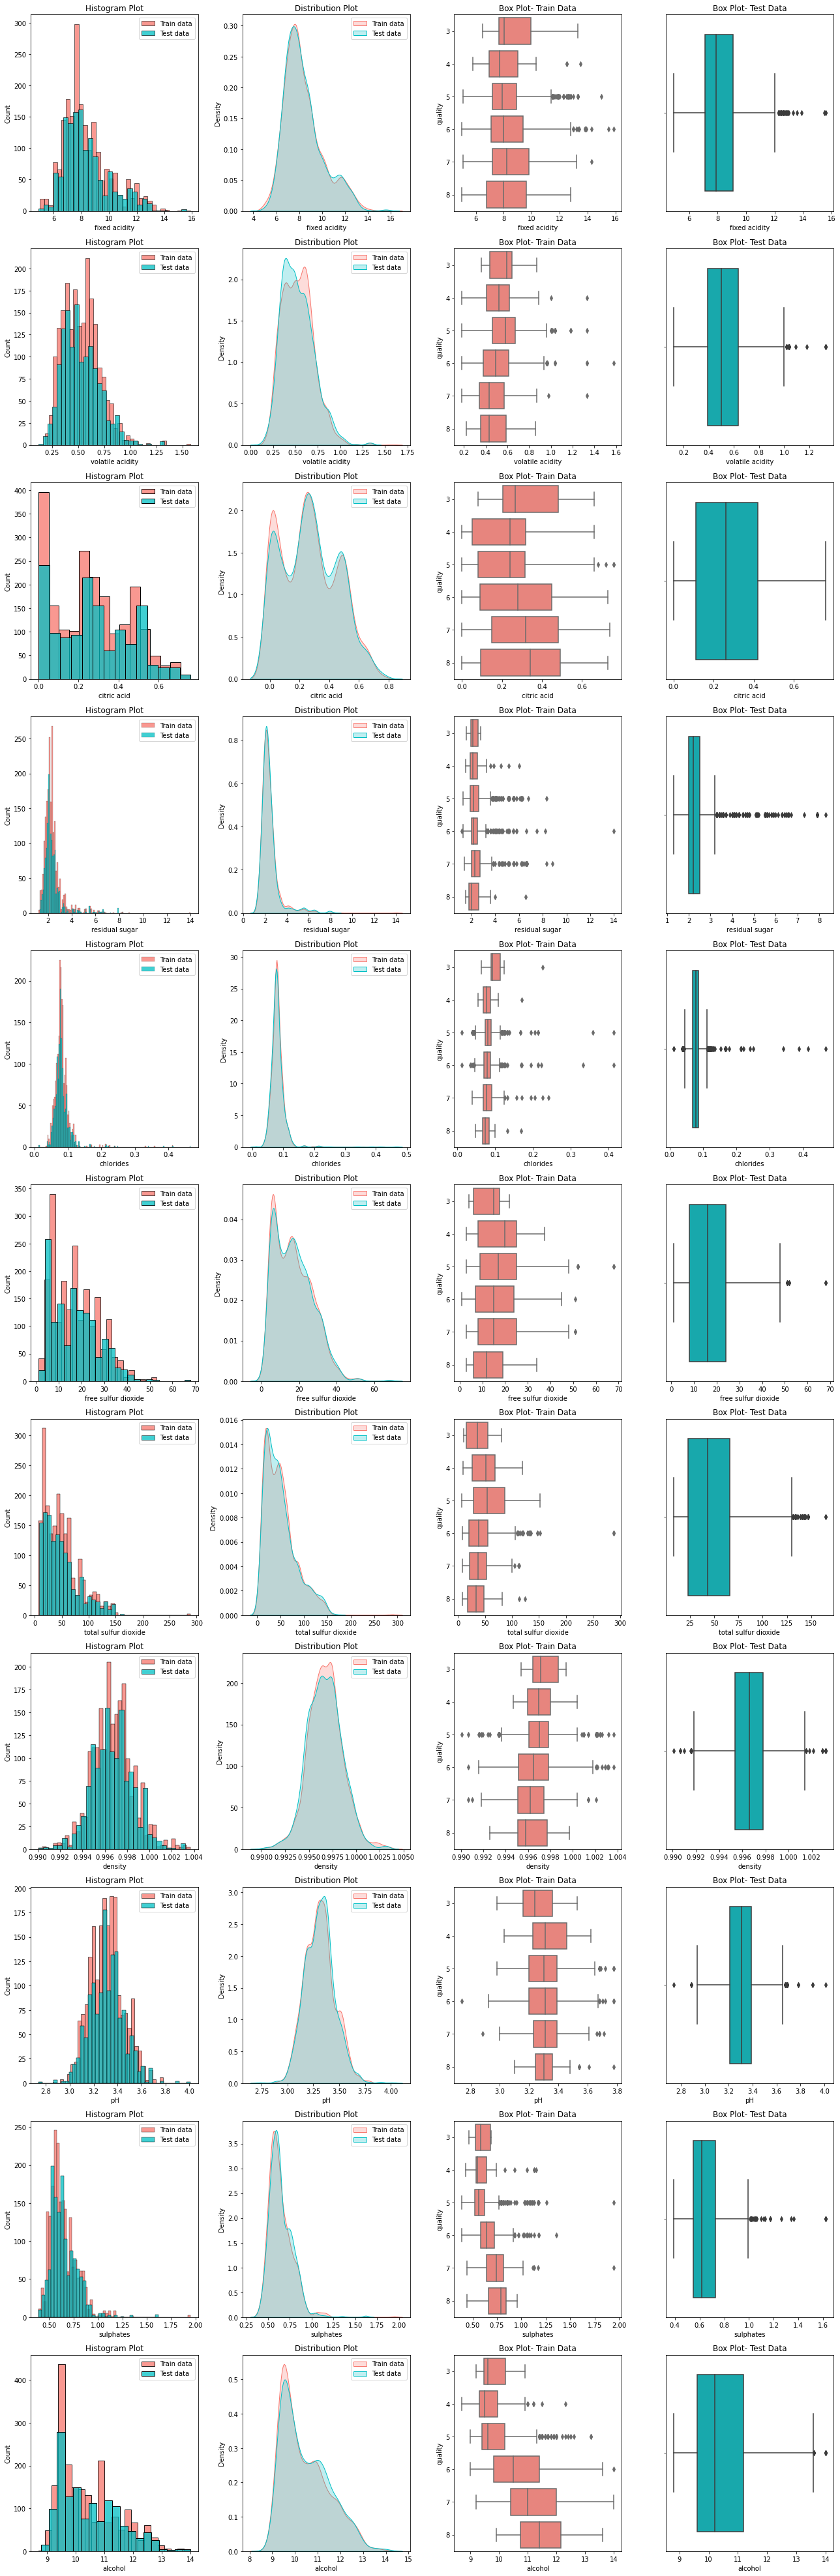

In [14]:
ncols = 4
nrows = len(cont_features)

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

for r in range(nrows):
    row = cont_features[r]
    
    
    sns.histplot(x=train[row], ax=axes[r,0], color='#F8766D', label='Train data' , fill =True )
    sns.histplot(x=test[row], ax=axes[r,0], color='#00BFC4', label='Test data', fill =True)
    
    sns.kdeplot(x=train[row], ax=axes[r,1], color='#F8766D', label='Train data' , fill =True )
    sns.kdeplot(x=test[row], ax=axes[r,1], color='#00BFC4', label='Test data', fill =True)
    
    sns.boxplot(x=train[row], y = train[TARGET], ax=axes[r,2], color='#F8766D', orient = "h")
    sns.boxplot(x=test[row], ax=axes[r,3], color='#00BFC4', orient = "h")
    
    axes[r,0].legend()
    axes[r,1].legend()
    axes[r,0].title.set_text("Histogram Plot")
    axes[r,1].title.set_text("Distribution Plot")
    axes[r,2].title.set_text("Box Plot- Train Data")
    axes[r,3].title.set_text("Box Plot- Test Data")
fig.tight_layout()
plt.show()

<a id="4.4"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

* There are no categorical features 

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.5"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Target Distribution :</u></b><br>
 
* <i>There are six target values - <b><u>3,4,5,6,7</u></b> and <b><u>8</u></b></i><br>

* <i>Targets are highly imbalanced.</i><br>
</div>

In [15]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count' , 
             color = "count",
             color_continuous_scale="Emrld") 
fig.show()
target_df.sort_values(by =TARGET , ignore_index = True)

,quality,count
0,3,12
1,4,55
2,5,839
3,6,778
4,7,333
5,8,39


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.6"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

In [16]:
fig = px.imshow(train.corr() , aspect="auto" , color_continuous_scale = "viridis")
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#00BFC4;">Data Pre-Processing  </span></center>**

In [17]:
encoder = LabelEncoder()

train[TARGET] = encoder.fit_transform(train[TARGET])

X = train.drop(TARGET , axis =1 )
y = train[TARGET]

<a id="6"></a>
# **<center><span style="color:#00BFC4;">Modeling </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Target Modelling :</u></b><br>
    
* <i> <u><b>LGBMClassifier</u></b> , <u><b>CatBoostClassifier</u></b> and <u><b>XGBClassifier</u></b> used in modelling on 5-fold validation.</i><br>
* <i> Further Hyperparameter tuning can imporve the results.</i><br>
    
</div>

In [18]:
lgb_params = {
    'objective' : 'multiclass',
    'metric' : 'multi_logloss',
    "n_estimators" : 100,
    "learning_rate": 0.08
    
}


lgb_predictions = []
lgb_scores = []
lgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    score = cohen_kappa_score(y_valid,  preds_valid, weights = "quadratic")
    lgb_scores.append(score)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Quadratic Kappa Metric score: {score:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    test_preds = model.predict(test[FEATURES])
    lgb_predictions.append(test_preds)
    
print("Mean Score :", np.mean(lgb_scores))

========== Fold=1 ==========
Fold=1, Quadratic Kappa Metric score: 0.49, Run Time: 0.77s
========== Fold=2 ==========
Fold=2, Quadratic Kappa Metric score: 0.47, Run Time: 0.61s
========== Fold=3 ==========
Fold=3, Quadratic Kappa Metric score: 0.49, Run Time: 0.61s
========== Fold=4 ==========
Fold=4, Quadratic Kappa Metric score: 0.40, Run Time: 0.70s
========== Fold=5 ==========
Fold=5, Quadratic Kappa Metric score: 0.51, Run Time: 0.63s
Mean Score : 0.47376604344099915


### <span style="color:#e76f51;">Feature Importance for LGBM Classifier</span>

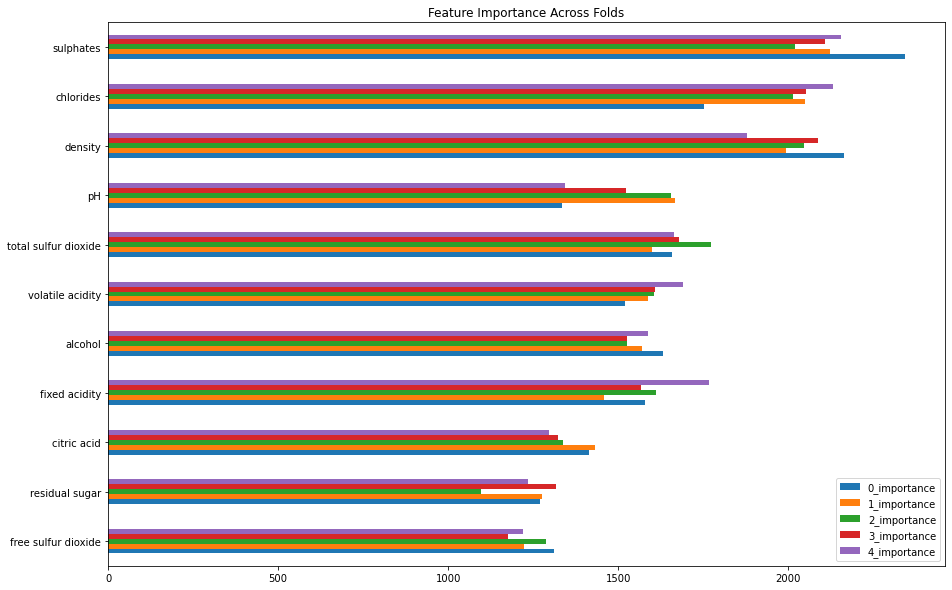

In [19]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.2"></a>
## <span style="color:#e76f51;"> CatBoost Classifier: </span>

In [20]:
catb_params = {
    "objective": "MultiClass",
    "loss_function" : "WKappa",
    "random_seed": 12,
}


catb_predictions = []
catb_scores = []
catb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = CatBoostClassifier(**catb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    score = cohen_kappa_score(y_valid,  preds_valid, weights = "quadratic")
    catb_scores.append(score)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Quadratic Kappa Metric score: {score:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    catb_fimp.append(fim)
    test_preds = model.predict(test[FEATURES])
    catb_predictions.append(test_preds)
    
print("Mean Score :", np.mean(catb_scores))

========== Fold=1 ==========
Fold=1, Quadratic Kappa Metric score: 0.47, Run Time: 5.56s
========== Fold=2 ==========
Fold=2, Quadratic Kappa Metric score: 0.46, Run Time: 5.64s
========== Fold=3 ==========
Fold=3, Quadratic Kappa Metric score: 0.52, Run Time: 5.66s
========== Fold=4 ==========
Fold=4, Quadratic Kappa Metric score: 0.42, Run Time: 5.44s
========== Fold=5 ==========
Fold=5, Quadratic Kappa Metric score: 0.49, Run Time: 5.36s
Mean Score : 0.47298505333928775


### <span style="color:#e76f51;">Feature Importance for CatBoost Classifier </span>

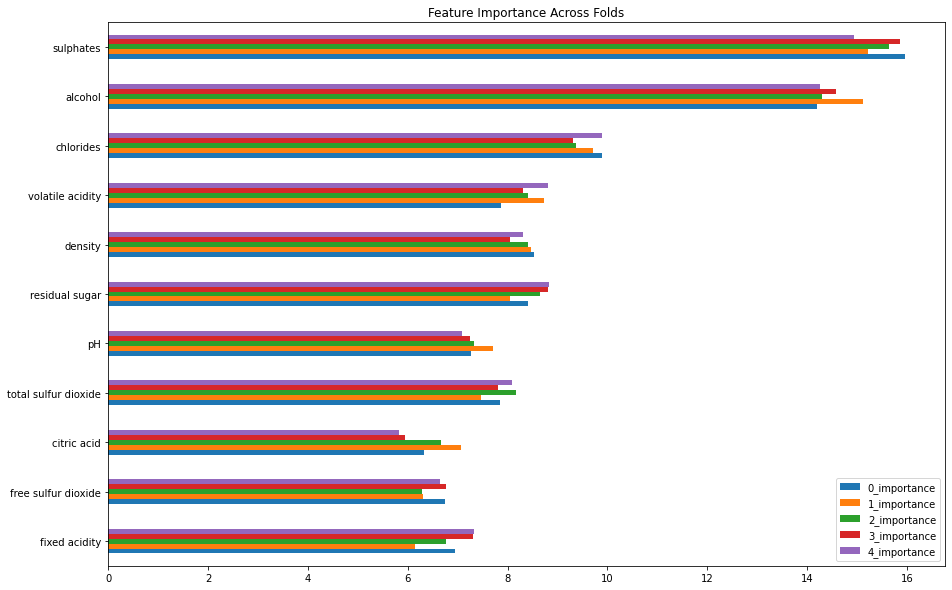

In [21]:
catb_fis_df = pd.concat(catb_fimp, axis=1).head(15)
catb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.2"></a>
## <span style="color:#e76f51;"> XGBoost Classifier: </span>

In [22]:
xgb_params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',

}


xgb_predictions = []
xgb_scores = []
xgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    score = cohen_kappa_score(y_valid,  preds_valid, weights = "quadratic")
    xgb_scores.append(score)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Quadratic Kappa Metric score : {score:.2f}, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[FEATURES])
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    xgb_fimp.append(fim)
    xgb_predictions.append(test_preds)
    
print("Mean Score :", np.mean(xgb_scores))

========== Fold=1 ==========
Fold=1, Quadratic Kappa Metric score : 0.51, Run Time: 1.01s
========== Fold=2 ==========
Fold=2, Quadratic Kappa Metric score : 0.42, Run Time: 0.98s
========== Fold=3 ==========
Fold=3, Quadratic Kappa Metric score : 0.47, Run Time: 1.00s
========== Fold=4 ==========
Fold=4, Quadratic Kappa Metric score : 0.40, Run Time: 0.97s
========== Fold=5 ==========
Fold=5, Quadratic Kappa Metric score : 0.47, Run Time: 0.98s
Mean Score : 0.4529769561965634


### <span style="color:#e76f51;">Feature Importance for XGBoost Classifier</span>

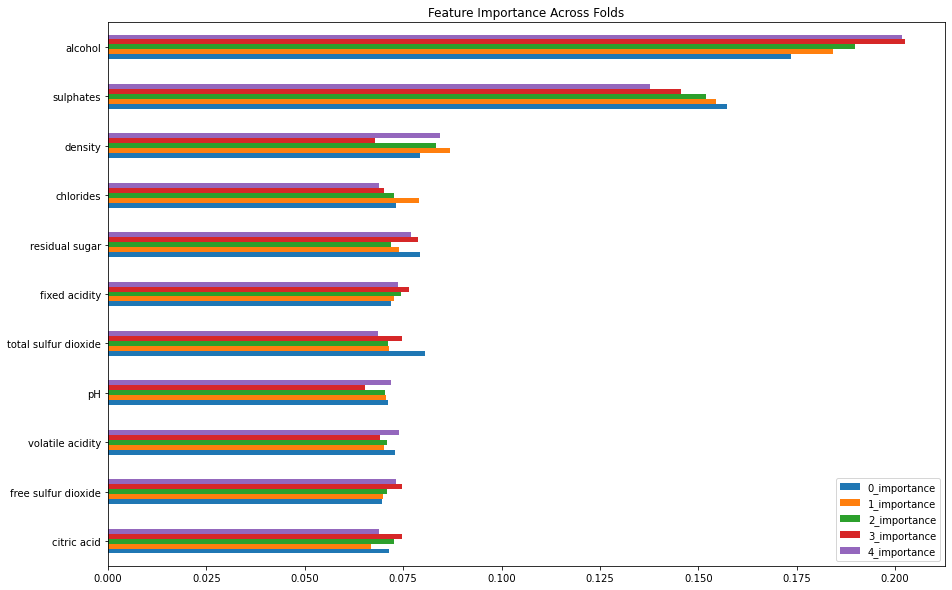

In [23]:
xgb_fis_df = pd.concat(xgb_fimp, axis=1).head(15)
xgb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="7"></a>
# **<center><span style="color:#00BFC4;">Submission </span></center>**

### <span style="color:#e76f51;">LGBM Classifier Submission : </span>

In [24]:
lgb_submission = submission.copy()
lgb_submission[TARGET] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(lgb_predictions),axis = 1)[0]).astype('int'))
lgb_submission.to_csv("lgb-subs.csv",index=False)

lgb_submission.head()

,Id,quality
0,2056,6
1,2057,6
2,2058,6
3,2059,6
4,2060,5


### <span style="color:#e76f51;">CATBoost Classifier Submission : </span>

In [25]:
catb_submission = submission.copy()
catb_submission[TARGET] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(catb_predictions),axis = 1)[0]).astype('int'))
catb_submission.to_csv("catb-subs.csv",index=False)
catb_submission.to_csv("submissions.csv",index=False)
catb_submission.head()

,Id,quality
0,2056,6
1,2057,6
2,2058,6
3,2059,6
4,2060,5


### <span style="color:#e76f51;">XGBoost Classifier Submission : </span>

In [26]:
xgb_submission = submission.copy()
xgb_submission[TARGET] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(xgb_predictions),axis = 1)[0]).astype('int'))
xgb_submission.to_csv("xgb-subs.csv",index=False)
xgb_submission.head()

,Id,quality
0,2056,6
1,2057,7
2,2058,5
3,2059,6
4,2060,5


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
